In [1]:
import pandas as pd
import datetime

df = pd.read_excel('Variacao.xlsx')
df

,Data,Quantidade Sócios,Crescimento #,Crescimento %
0,2023-07-27,40647,0,0.000000
1,2023-07-28,41168,521,0.012818
2,2023-07-29,42644,1476,0.035853
3,2023-07-30,42847,203,0.004760
4,2023-08-01,44802,1955,0.045627
5,2023-08-03,47363,2561,0.057163
6,2023-08-04,48628,1265,0.026709
7,2023-08-05,48826,198,0.004072
8,2023-08-06,48904,78,0.001598
9,2023-08-07,48887,-17,-0.000348


In [2]:
variacao = df['Quantidade Sócios'].iloc[-1] / df['Quantidade Sócios'].iloc[0] -1 

first_day = df['Data'].iloc[0]
last_day = df['Data'].iloc[-1]
total_days = abs((last_day - first_day).days) + 1

print(f'A variação até agora foi de {variacao:.2%} em {total_days} dias')

A variação até agora foi de 35.47% em 28 dias


In [3]:
t1 = df.iloc[[0],[0,1]]
t2 = df.iloc[[-1],[0,1]]

tt = pd.concat([t1,t2])
tt['Crescimento #'] = tt['Quantidade Sócios']- tt['Quantidade Sócios'].iloc[0]
tt['Crescimento %'] = tt['Quantidade Sócios'] / tt['Quantidade Sócios'].iloc[0] -1
tt

,Data,Quantidade Sócios,Crescimento #,Crescimento %
0,2023-07-27,40647,0,0.000000
25,2023-08-23,55063,14416,0.354663


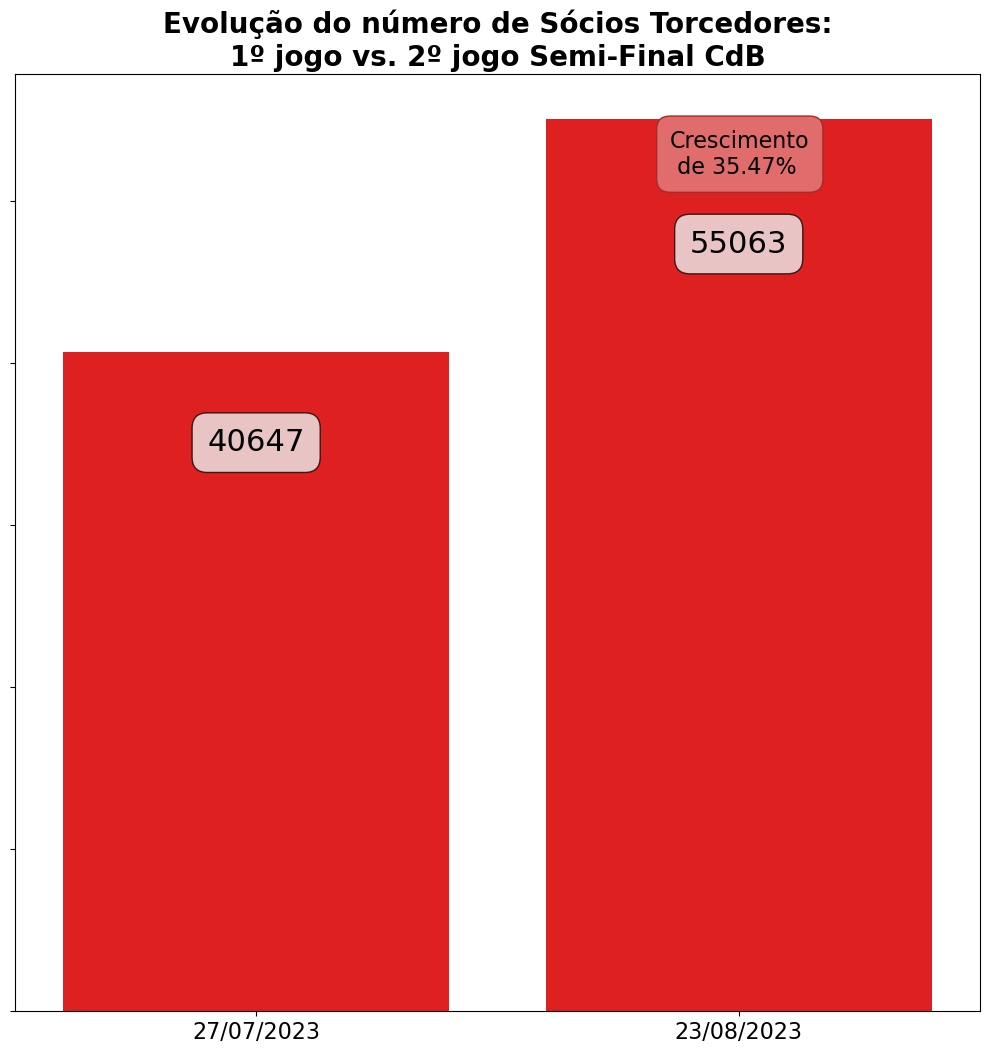

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

datas = tt['Data']
datas_form = [pd.to_datetime(v).strftime('%d/%m/%Y') for v in datas.values]
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(tt, x=datas_form, y='Quantidade Sócios', color='red')
ax.set_xlabel('', size=20)
ax.set_xticklabels(labels=datas_form, fontsize=16)
ax.set_ylabel('')
for p in ax.patches:
    h = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, h *0.85,
        f'{int(h)}',
        size=22,
        ha='center',
        bbox=dict(facecolor='#ecfcfe', alpha=0.75, boxstyle='round,pad=0.5'))
ax.yaxis.set_tick_params(labelleft=False)
crescimento = tt['Crescimento %'].iloc[-1]
crsc_txt = f'Crescimento\n de {crescimento:.2%}'

plt.tight_layout()

plt.annotate(crsc_txt, (670,880), xycoords='subfigure pixels', size=16,  bbox=dict(boxstyle="round,pad=0.6",
                      fc="#e06c6c", ec='brown',lw=1))
ax.set_title('Evolução do número de Sócios Torcedores:\n1º jogo vs. 2º jogo Semi-Final CdB',size=20, weight='bold') 

year = str(datetime.datetime.now().year)
month = '0'+str(datetime.datetime.now().month) if datetime.datetime.now().month < 10 else str(datetime.datetime.now().month)
day = '0'+str(datetime.datetime.now().day) if datetime.datetime.now().day < 10 else str(datetime.datetime.now().day)

today = f'{year}-{month}-{day}'

fig.savefig('images/'+today+'.png',dpi=fig.dpi, bbox_inches='tight', pad_inches=0.1)
